Step 0: Synthetic Data Generation

In [ ]:
import pandas as pd
import random

# number of samples
n = 5000

data = {
    # Customer Demographics
    "Customer_ID": [1000 + i for i in range(n)],
    "Age": [random.randint(18, 65) for _ in range(n)],
    "Gender": [random.choice(["Male", "Female"]) for _ in range(n)],
    "Annual_Income": [random.randint(20000, 120000) for _ in range(n)],

    # Behavioral Data
    "Previous_Purchases": [random.randint(0, 40) for _ in range(n)],
    "Spending_Score": [random.randint(1, 100) for _ in range(n)],
    "Engagement_Level": [random.choice(["Low", "Medium", "High"]) for _ in range(n)],

    # Product / Service Context
    "Offering_Type": [random.choice(["Product", "Service"]) for _ in range(n)],
    "Offering_Category": [
        random.choice(["Electronics", "Clothing", "Food", "Subscription", "Consulting", "Streaming"])
        for _ in range(n)
    ],

    # Interaction Signals
    "Discount_Used": [random.choice(["Yes", "No"]) for _ in range(n)],
    "Promo_Used": [random.choice(["Yes", "No"]) for _ in range(n)],
    "Visit_Frequency": [random.choice(["Low", "Medium", "High"]) for _ in range(n)],
}

df = pd.DataFrame(data)


# # Save to Excel
file_path = "/content/Customer_Purchase_Product_Service_Dataset.xlsx"
df.to_excel(file_path, index=False)


df

Customer_ID  Age  Gender  Annual_Income  Previous_Purchases  \
0            1000   49  Female          44088                  35   
1            1001   58    Male          94365                  26   
2            1002   34    Male         100659                  23   
3            1003   36    Male         119746                   4   
4            1004   50  Female          92226                  33   
...           ...  ...     ...            ...                 ...   
4995         5995   19    Male          72869                  18   
4996         5996   37    Male          60845                   1   
4997         5997   46    Male          46887                  11   
4998         5998   56  Female          64259                   0   
4999         5999   50    Male          89512                   4   

      Spending_Score Engagement_Level Offering_Type Offering_Category  \
0                 35              Low       Product      Subscription   
1                 66           Medium       Product        Consulting   
2                 64              Low       Product         Streaming   
3                 52             High       Product       Electronics   
4                  6             High       Service              Food   
...              ...              ...           ...               ...   
4995              56           Medium       Product       Electronics   
4996              65              Low       Service        Consulting   
4997               4           Medium       Service       Electronics   
4998              87             High       Product      Subscription   
4999              28              Low       Product      Subscription   

     Discount_Used Promo_Used Visit_Frequency  
0               No         No            High  
1              Yes        Yes          Medium  
2               No        Yes            High  
3              Yes         No          Medium  
4              Yes         No             Low  
...            ...        ...             ...  
4995           Yes        Yes            High  
4996            No        Yes            High  
4997           Yes         No          Medium  
4998           Yes        Yes            High  
4999            No         No             Low  

[5000 rows x 12 columns]

In [ ]:
df

Customer_ID  Age  Gender  Annual_Income  Previous_Purchases  \
0            1000   49       0          44088                  35   
1            1001   58       1          94365                  26   
2            1002   34       1         100659                  23   
3            1003   36       1         119746                   4   
4            1004   50       0          92226                  33   
...           ...  ...     ...            ...                 ...   
4995         5995   19       1          72869                  18   
4996         5996   37       1          60845                   1   
4997         5997   46       1          46887                  11   
4998         5998   56       0          64259                   0   
4999         5999   50       1          89512                   4   

      Spending_Score Engagement_Level Offering_Type Offering_Category  \
0                 35              Low       Product      Subscription   
1                 66           Medium       Product        Consulting   
2                 64              Low       Product         Streaming   
3                 52             High       Product       Electronics   
4                  6             High       Service              Food   
...              ...              ...           ...               ...   
4995              56           Medium       Product       Electronics   
4996              65              Low       Service        Consulting   
4997               4           Medium       Service       Electronics   
4998              87             High       Product      Subscription   
4999              28              Low       Product      Subscription   

     Discount_Used Promo_Used Visit_Frequency  
0               No         No            High  
1              Yes        Yes          Medium  
2               No        Yes            High  
3              Yes         No          Medium  
4              Yes         No             Low  
...            ...        ...             ...  
4995           Yes        Yes            High  
4996            No        Yes            High  
4997           Yes         No          Medium  
4998           Yes        Yes            High  
4999            No         No             Low  

[5000 rows x 12 columns]



# 📊 Customer Purchase Prediction Using Classification Algorithms

## 📌 Project Overview

This project aims to build a **classification model** that predicts
whether a customer will **purchase a product/service** based on
demographic and behavioral data.



------------------------------------------------------------------------

## 🎯 Objective

To predict **Purchase (Yes/No)** using customer attributes such as:

-   Age
-   Gender
-   Annual Income
-   Spending Score
-   Previous Purchase
-   Engagement Score

------------------------------------------------------------------------



## 🧰 Libraries Used

In [ ]:
import warnings
warnings.filterwarnings('ignore') # HAndling Warinings

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier


## 📁 Step 1: Dataset Creation (Synthetic Dataset)


In [ ]:


df = pd.read_csv('Customer_Purchase_Product_Service_Dataset (1).csv')

df.head()


Customer_ID  Age  Gender  Annual_Income  Previous_Purchases  \
0         1000   24  Female          71883                  17   
1         1001   55  Female          97655                  25   
2         1002   34  Female          58827                  19   
3         1003   26  Female          48487                  24   
4         1004   56  Female          48850                   2   

   Spending_Score Engagement_Level Offering_Type Offering_Category  \
0              97           Medium       Service        Consulting   
1              71             High       Service       Electronics   
2               5              Low       Product        Consulting   
3              83              Low       Product              Food   
4              97           Medium       Product       Electronics   

  Discount_Used Promo_Used Visit_Frequency  
0            No        Yes          Medium  
1            No         No             Low  
2            No        Yes            High  
3           Yes        Yes             Low  
4           Yes         No          Medium


* **Customer_ID**: Unique identifier assigned to each customer.
* **Age**: Customer’s age in years.
* **Gender**: Customer’s gender (e.g., Male, Female).
* **Annual_Income**: Customer’s yearly income in monetary units.
* **Previous_Purchases**: Number of purchases the customer has made in the past.
* **Spending_Score**: Score (typically 1–100) indicating how much the customer tends to spend; higher means more spending.
* **Engagement_Level**: Overall interaction level of the customer with the business (Low, Medium, High).
* **Offering_Type**: Type of offering purchased by the customer (Product or Service).
* **Offering_Category**: Specific category of the product or service (e.g., Consulting, Electronics, Food).
* **Discount_Used**: Indicates whether the customer used a discount (Yes/No).
* **Promo_Used**: Indicates whether a promotional offer was used (Yes/No).
* **Visit_Frequency**: How often the customer visits or interacts with the business (Low, Medium, High).




## 🔍 Step 2: Data Understanding And EDA


In [26]:
df.shape

(5000, 12)

### Insights:
---
The Data Have the 5000 Rows and also 12 Columns

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Customer_ID         5000 non-null   int64 
 1   Age                 5000 non-null   int64 
 2   Gender              5000 non-null   object
 3   Annual_Income       5000 non-null   int64 
 4   Previous_Purchases  5000 non-null   int64 
 5   Spending_Score      5000 non-null   int64 
 6   Engagement_Level    5000 non-null   object
 7   Offering_Type       5000 non-null   object
 8   Offering_Category   5000 non-null   object
 9   Discount_Used       5000 non-null   object
 10  Promo_Used          5000 non-null   object
 11  Visit_Frequency     5000 non-null   object
dtypes: int64(5), object(7)
memory usage: 468.9+ KB


### Insights:
---
There are no null values and also the datas are only upof 2 types int and Object only

In [28]:
df.describe()

Customer_ID          Age  Annual_Income  Previous_Purchases  \
count  5000.000000  5000.000000    5000.000000         5000.000000   
mean   3499.500000    41.555400   70227.640600           19.912200   
std    1443.520003    13.716332   28789.256422           11.878363   
min    1000.000000    18.000000   20100.000000            0.000000   
25%    2249.750000    30.000000   45761.750000           10.000000   
50%    3499.500000    41.000000   70112.000000           20.000000   
75%    4749.250000    53.250000   95128.000000           30.000000   
max    5999.000000    65.000000  119958.000000           40.000000   

       Spending_Score  
count     5000.000000  
mean        49.757600  
std         28.885556  
min          1.000000  
25%         24.000000  
50%         50.000000  
75%         75.000000  
max        100.000000

### Insights:

---
The customer base is middle-aged on average (~42 years) with a wide income range, but most earn around $70K annually. Spending scores are evenly distributed around the midpoint (≈50), suggesting balanced buying behavior, while prior purchases show moderate engagement with noticeable variation across customers.


In [29]:
cat_cols=df.select_dtypes(include='object').columns #Collecting Categorical columns
num_cols = df.select_dtypes(exclude='object').columns#Collecting Numerical Columns

In [30]:
df[num_cols].skew()

Customer_ID           0.000000
Age                   0.018338
Annual_Income        -0.005570
Previous_Purchases    0.024207
Spending_Score        0.027992
dtype: float64

###Insights:


---


Annual_Income and Age distributions are neutral, meaning our customer base is evenly spread across different brackets rather than being dominated by extreme outlieers


---


The near-zero skew in Spending_Score and Previous_Purchases suggests that customer engagement is consistent across oour entire database, with no single group disproportiionately skewing the results

## UNivariate Analysis

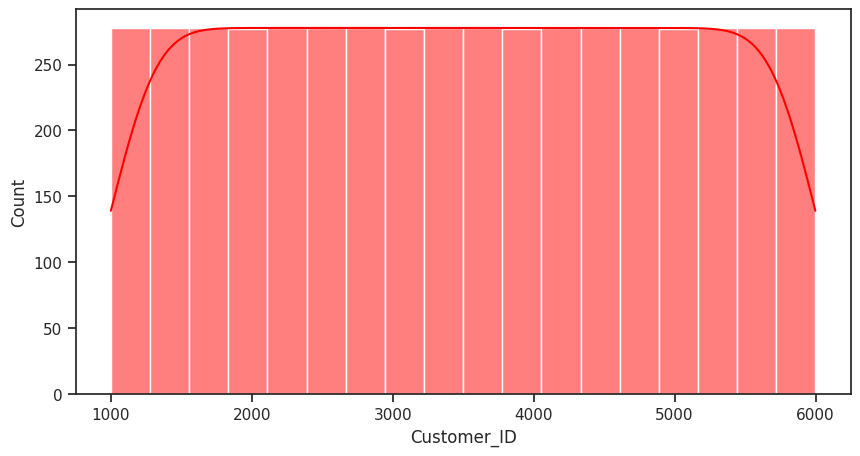

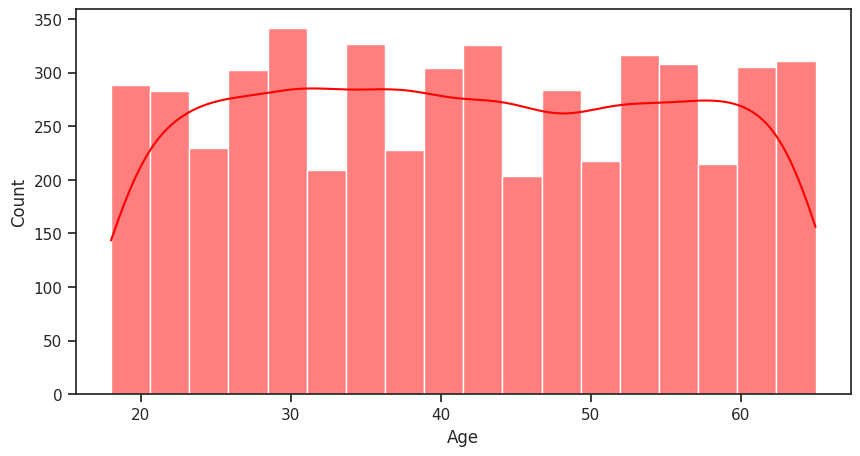

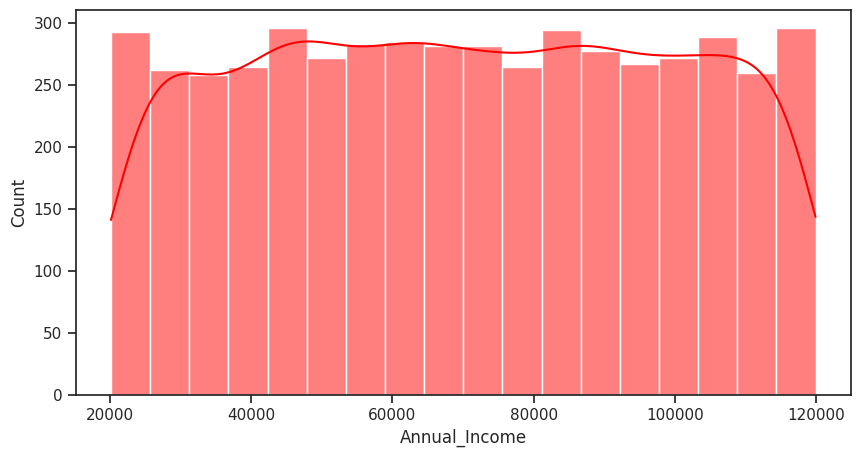

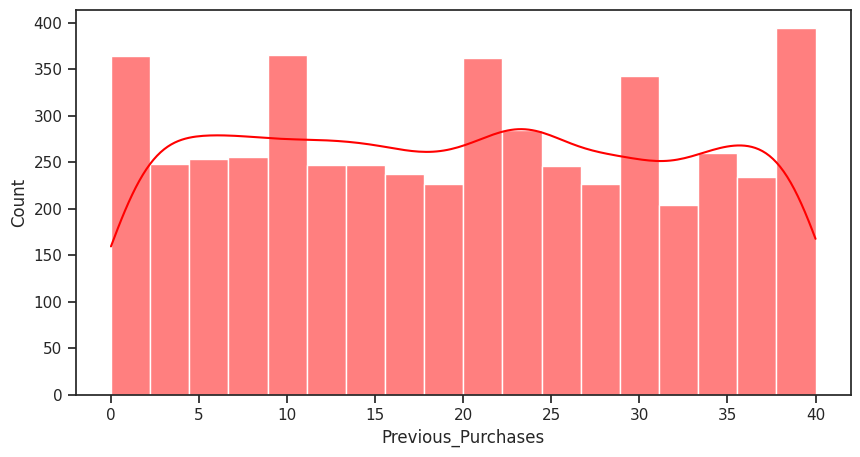

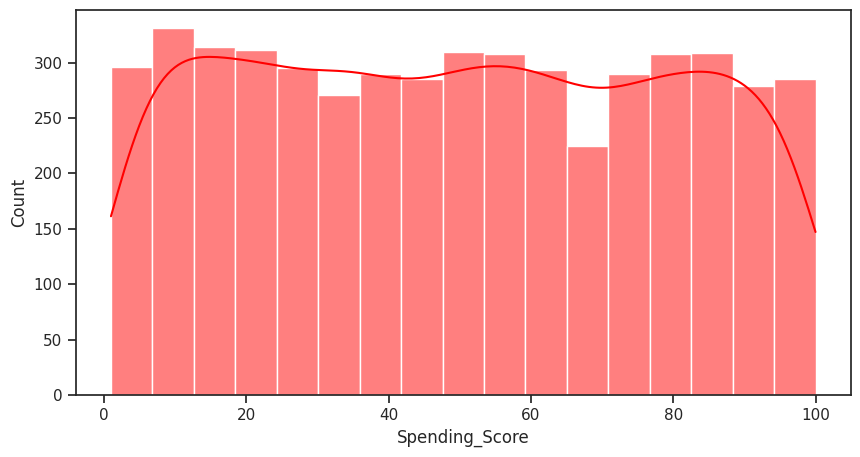

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

for i in num_cols:
  plt.figure(figsize=(10,5))
  sns.histplot(df[i],kde=True,color='red')
  plt.show()

### Outlier Detection
#### Box PLot Using

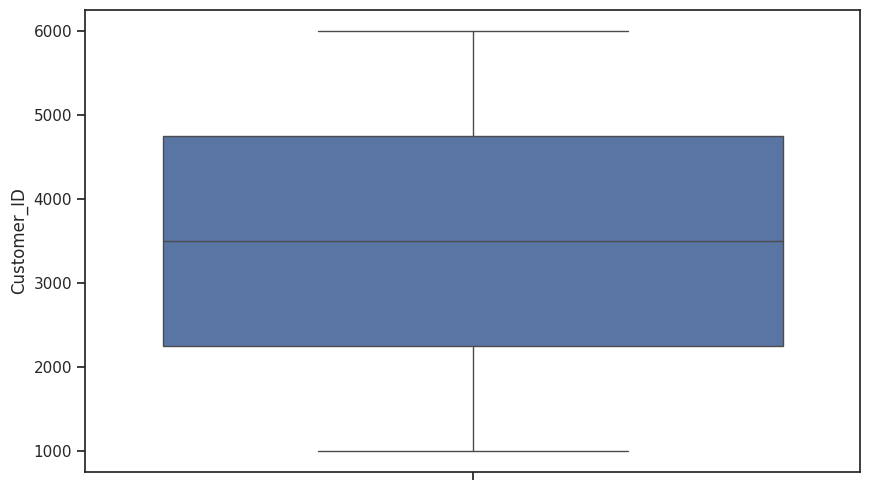

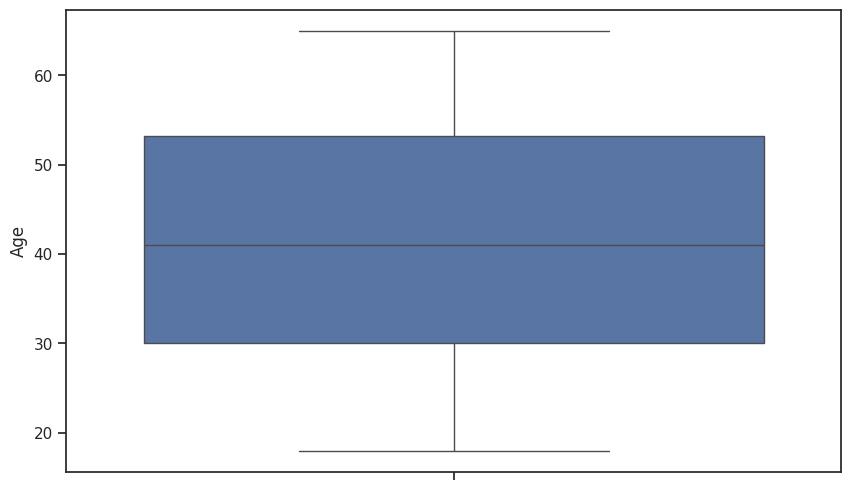

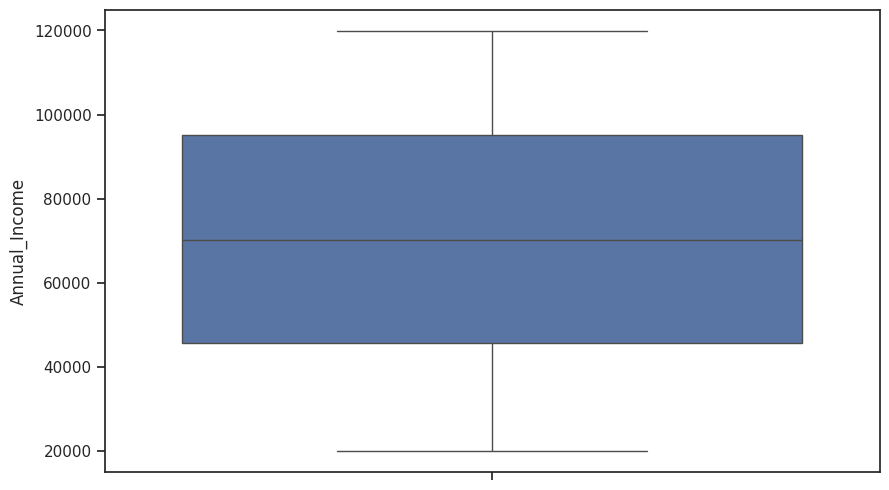

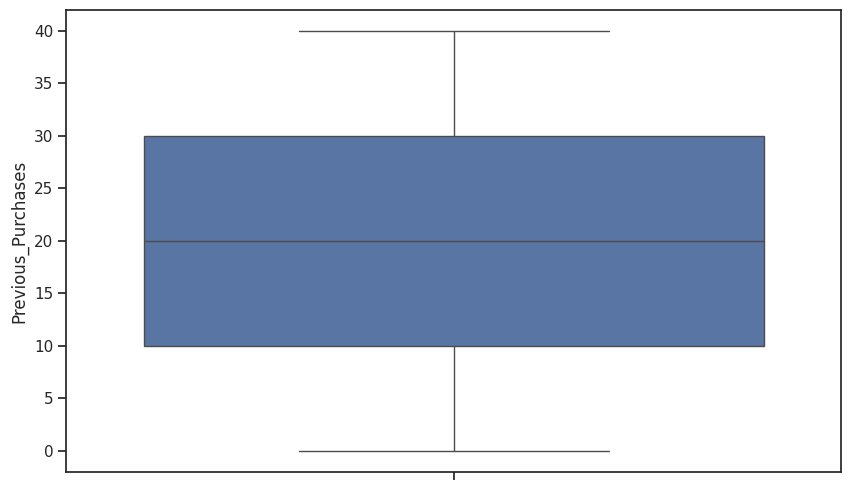

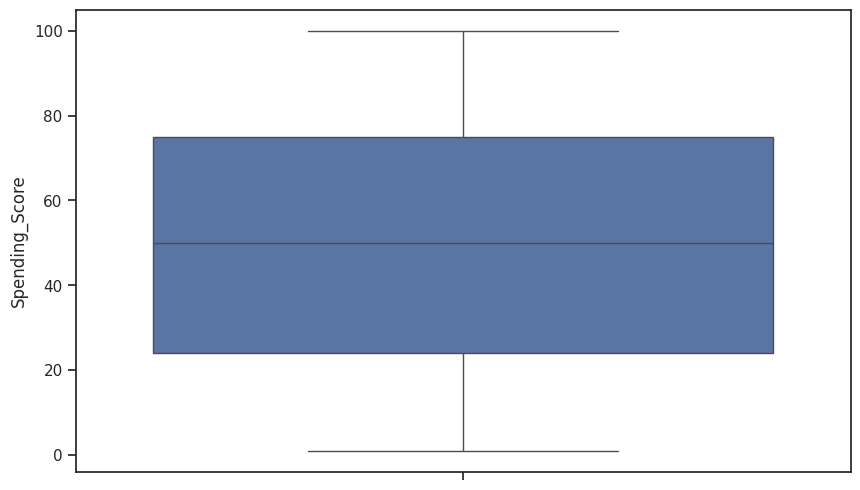

In [40]:
for i in num_cols:
  plt.figure(figsize=(10,6))
  sns.boxplot(df[i])
  plt.show()


Insights:
```
NO Outliers Detected
```



## Bivariate Analysis

Age Vs Annual_income


In [56]:
spearman =df['Age'].corr(df['Annual_Income'],method='spearman')
pearson=df['Age'].corr(df['Annual_Income'],method='pearson')
print("Differnce: ",pearson-spearman)

if spearman>pearson:
  print("the relationship between [AGE] and [Annual Income] is likely monotonic but not linear (an exponential curve)")
else:
  print("indicates an outlier is skewing the Pearson result.")
print("Spearman Correlation:",spearman)
print("Pearson Correlation:",pearson)

Differnce:  -8.00351072279687e-05
the relationship between [AGE] and [Annual Income] is likely monotonic but not linear (an exponential curve)
Spearman Correlation: 0.0168497652102833
Pearson Correlation: 0.01676973010305533


Spending_Score vs Previous_Purchases

In [55]:
spearman=df['Spending_Score'].corr(df['Previous_Purchases'],method='spearman')
pearson=df['Spending_Score'].corr(df['Previous_Purchases'],method='pearson')
print("Differnce: ",pearson-spearman)
if pearson>spearman:
  print("the relationship between [Spending_Score] and [Previous_Purchases] is likely monotonic but not linear (an exponential curve)")
else:
  print("indicates an outlier is skewing the Pearson result.")

print("Spearman Correlation:",spearman)
print("Pearson Correlation:",pearson)

Differnce:  0.00010298622009313405
the relationship between [Spending_Score] and [Previous_Purchases] is likely monotonic but not linear (an exponential curve)
Spearman Correlation: 0.01649053844272962
Pearson Correlation: 0.016593524662822753


## Correlation HEat Map

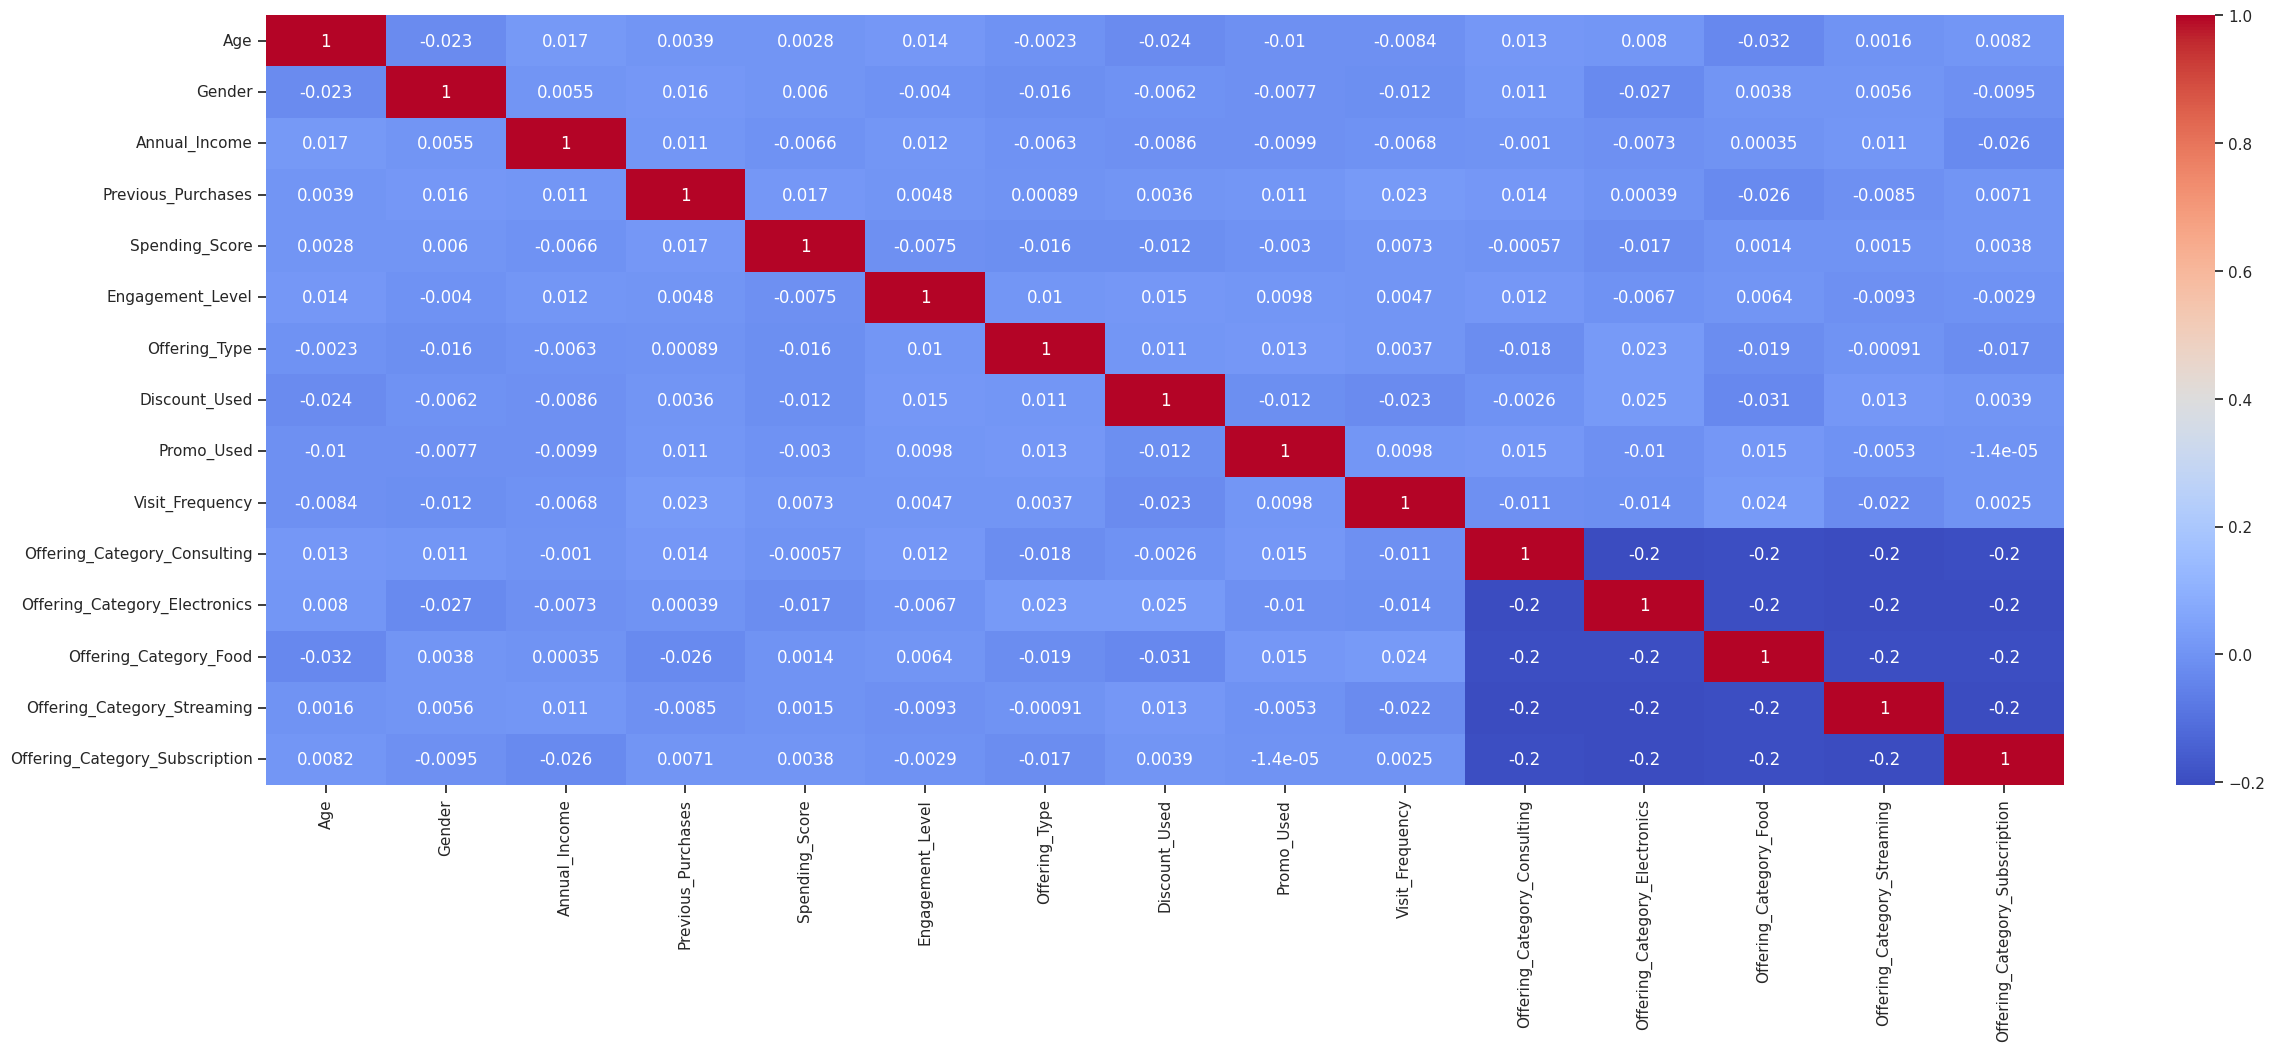

In [132]:
plt.figure(figsize=(29,10))
corr_matrix = df.corr(numeric_only=True)

# Plot the heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

### Scatter Plot

Age Vs Annual_Income

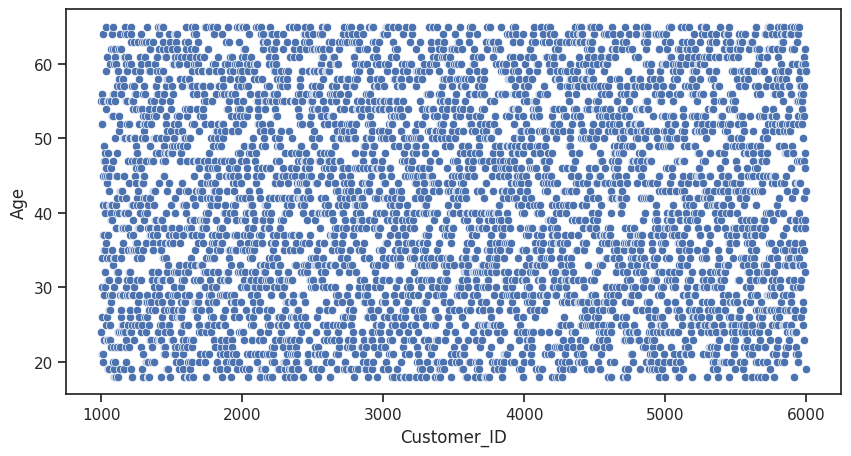

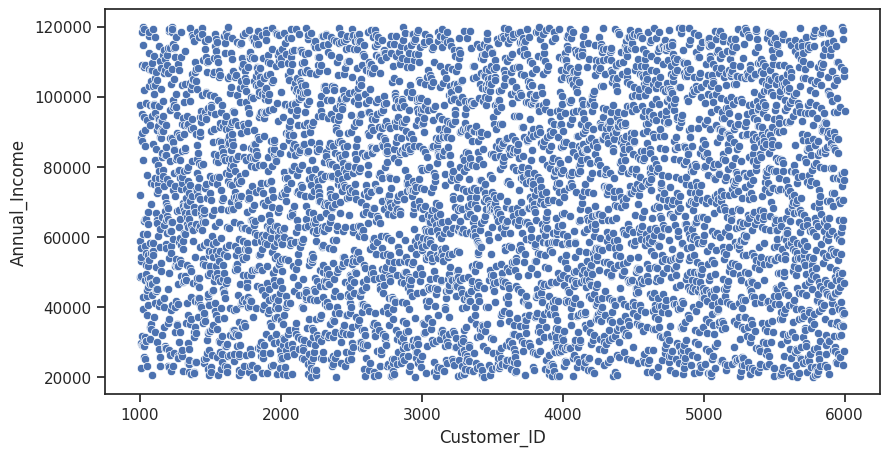

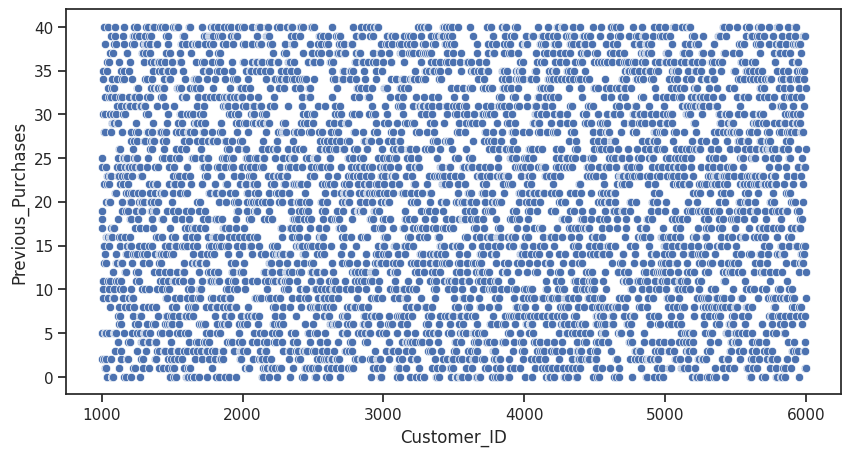

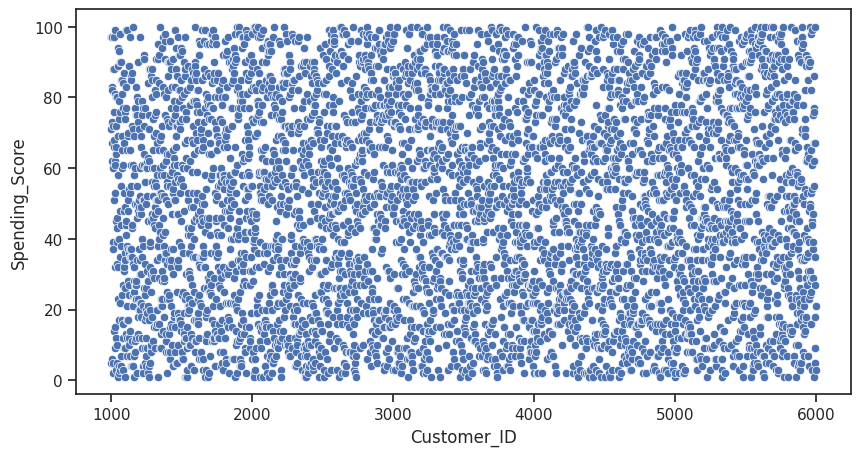

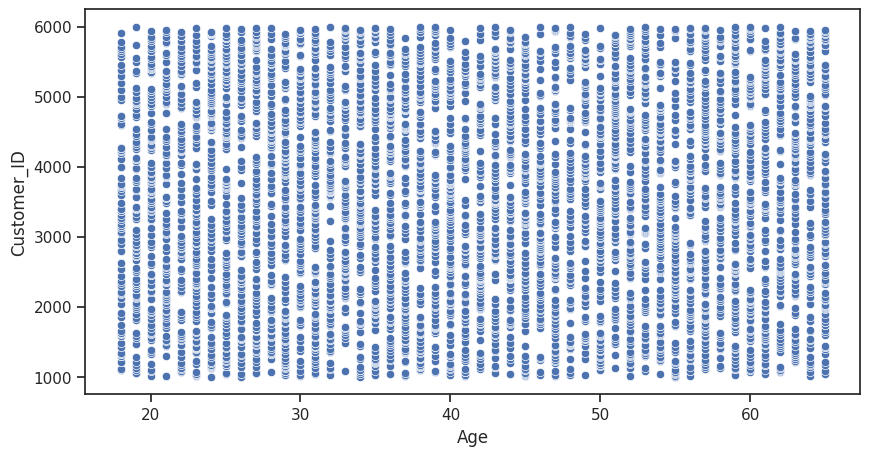

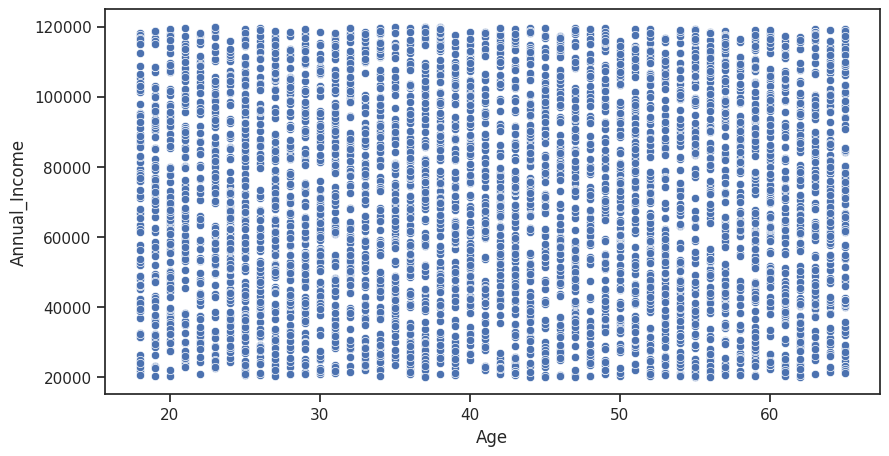

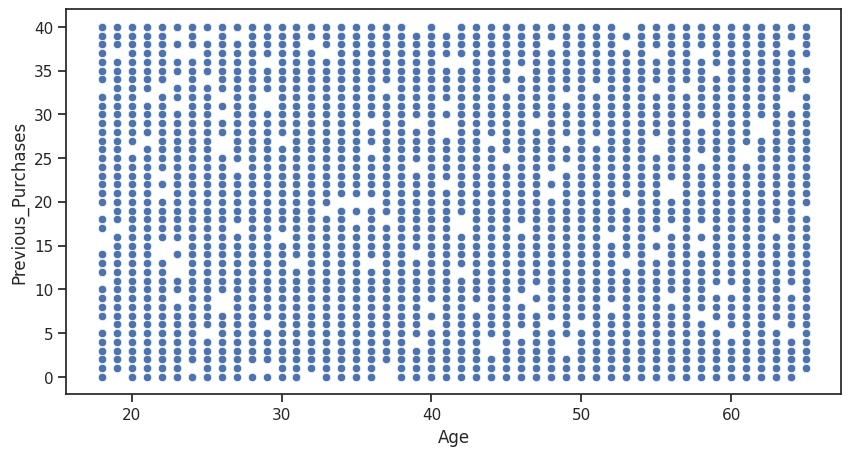

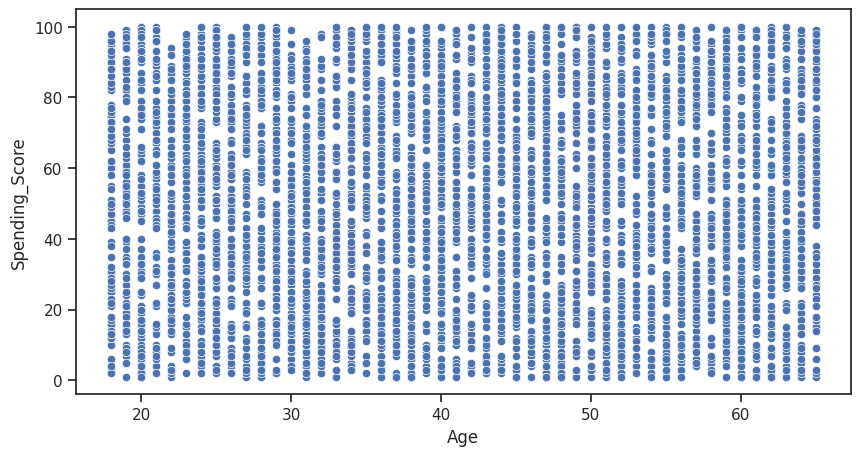

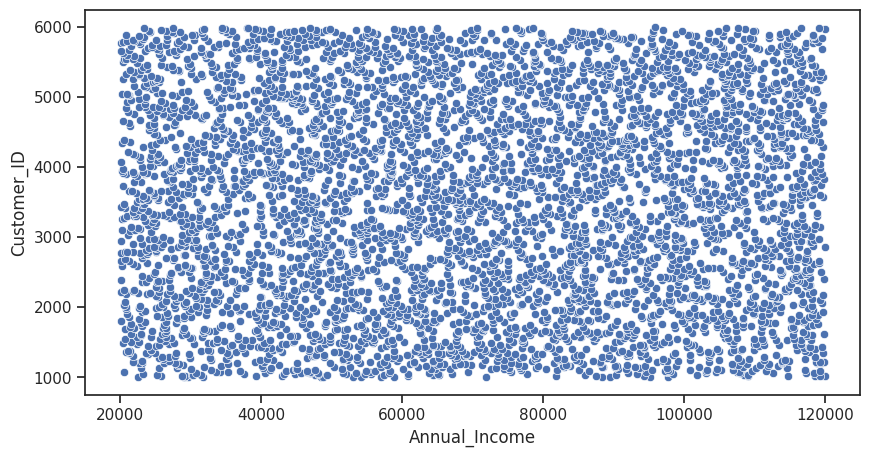

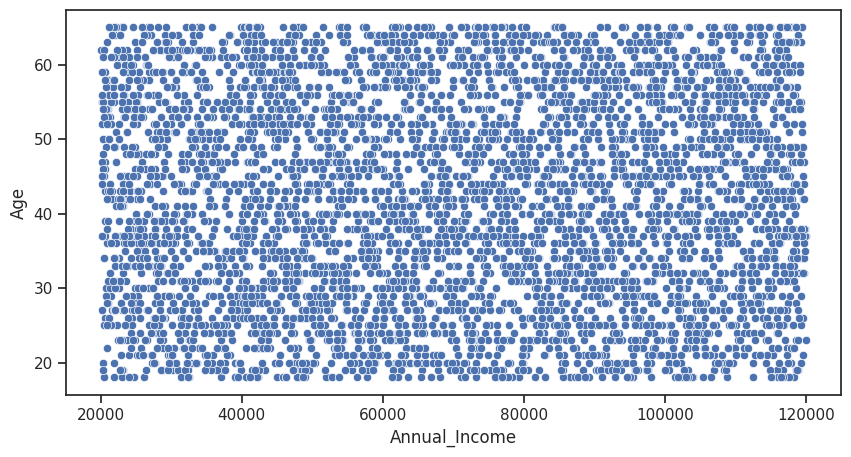

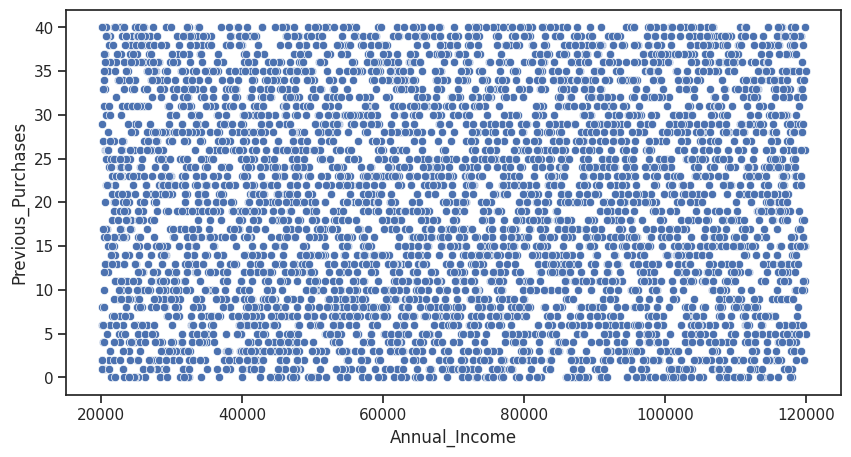

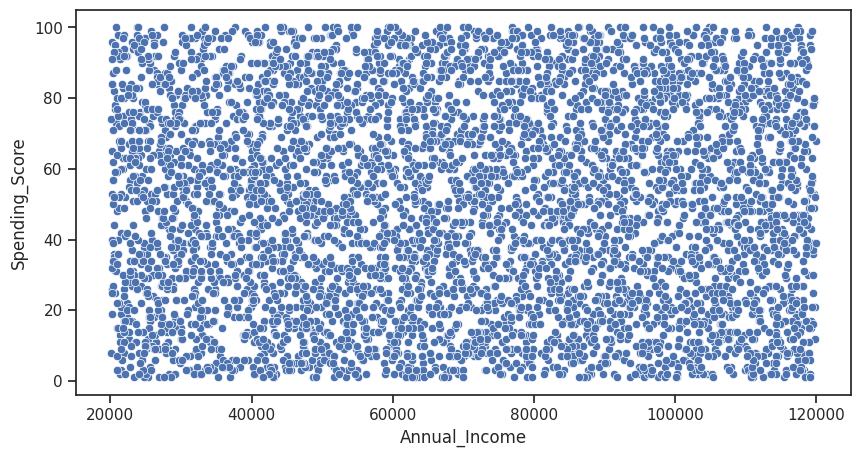

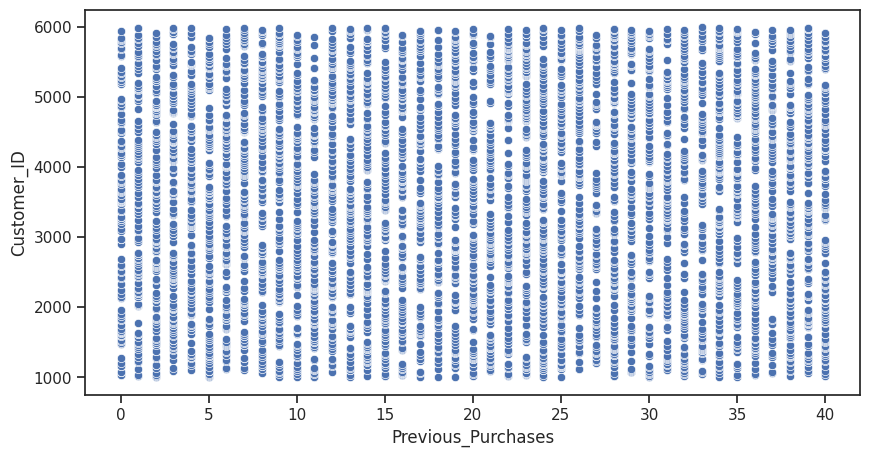

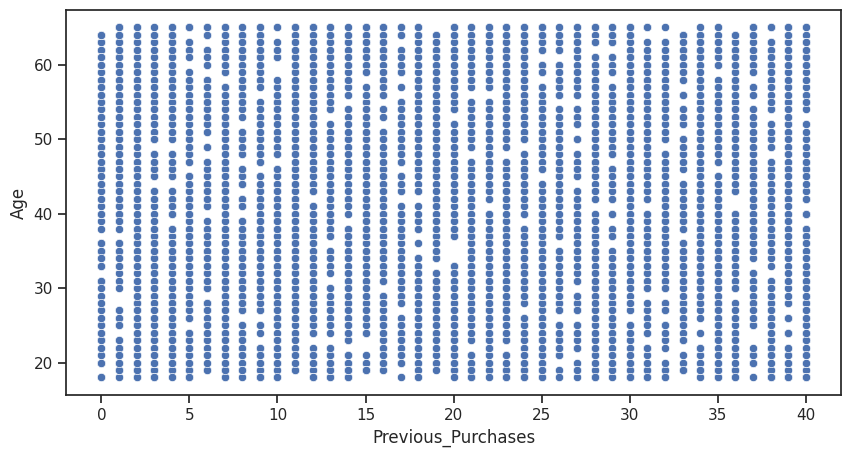

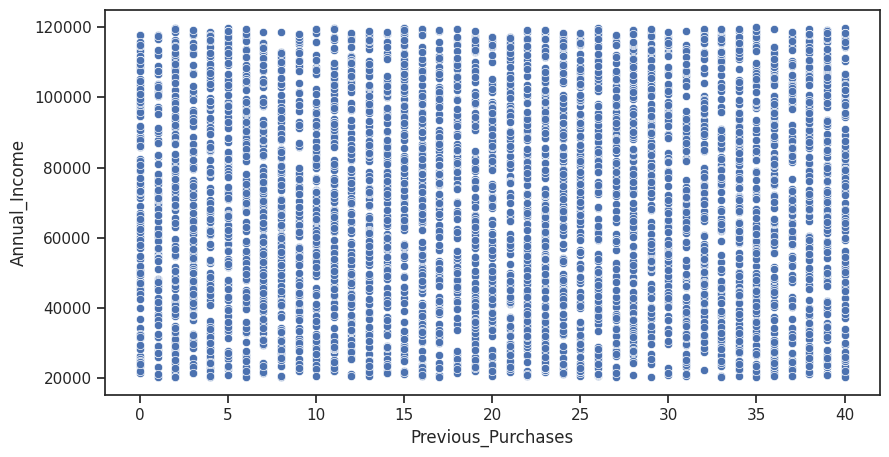

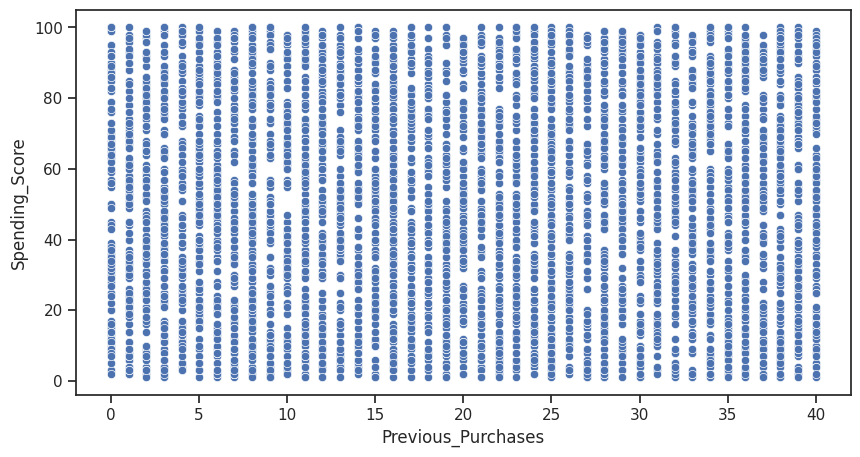

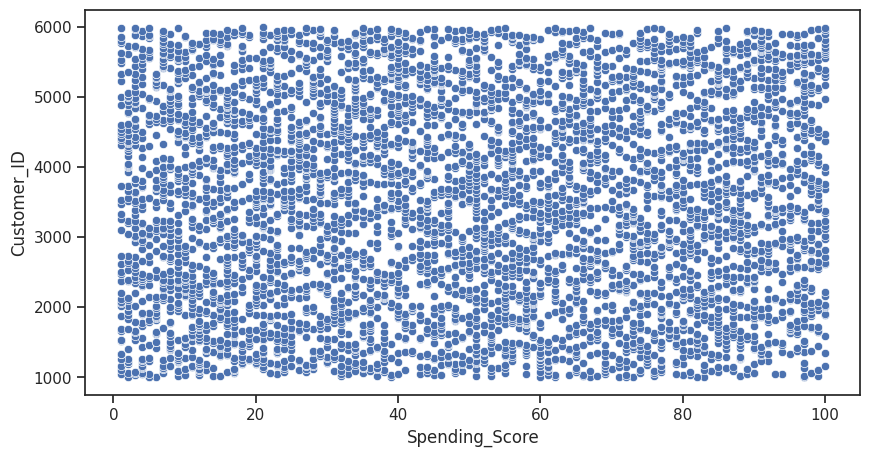

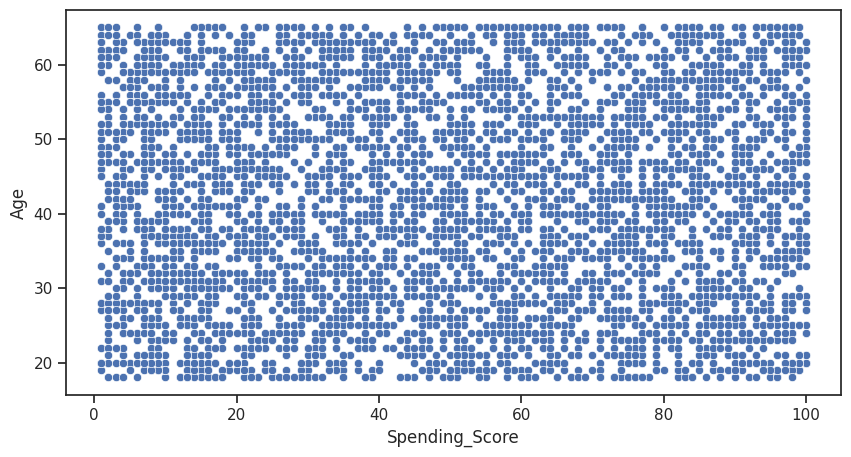

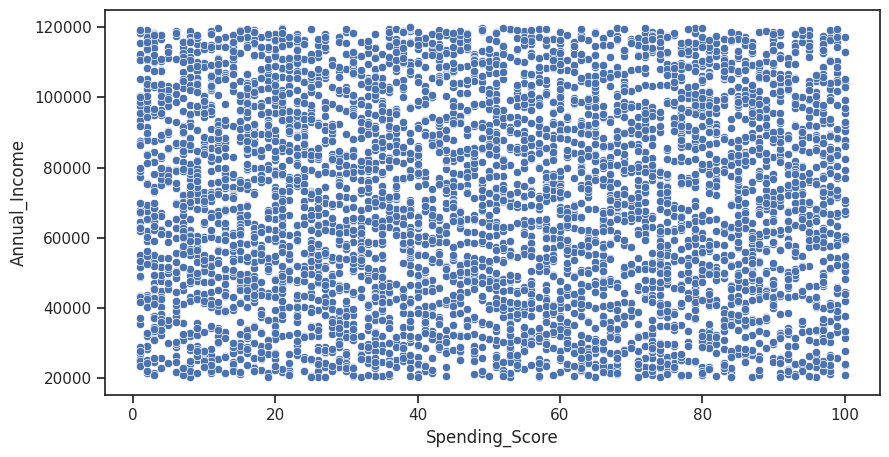

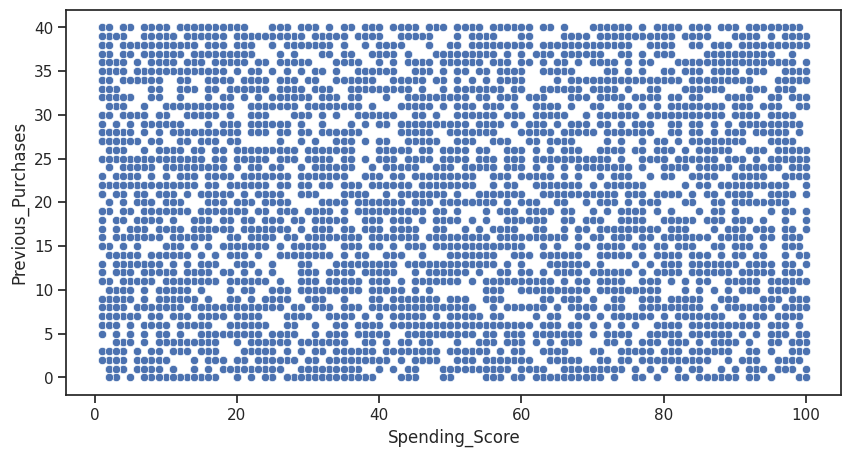

In [90]:

for i in num_cols:
  for j in num_cols:
    if i!=j:
      plt.figure(figsize=(10,5))
      sns.scatterplot(x=df[i], y=df[j])
      plt.savefig("seaborn_plot.png")
      plt.show()

Text(0, 0.5, 'Annual_Income')

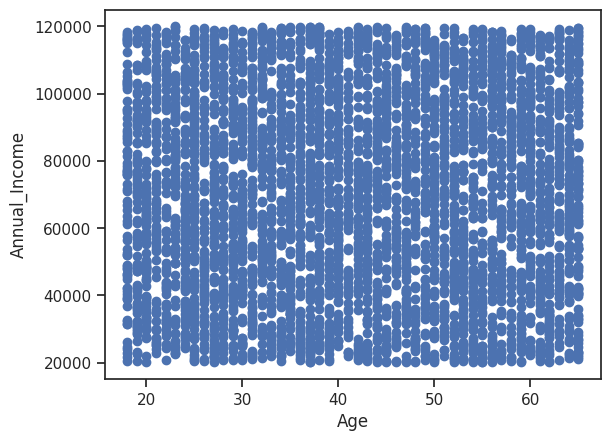

In [57]:
plt.scatter(df['Age'],df['Annual_Income'])
plt.xlabel('Age')
plt.ylabel('Annual_Income')

Text(0, 0.5, 'Previous_Purchases')

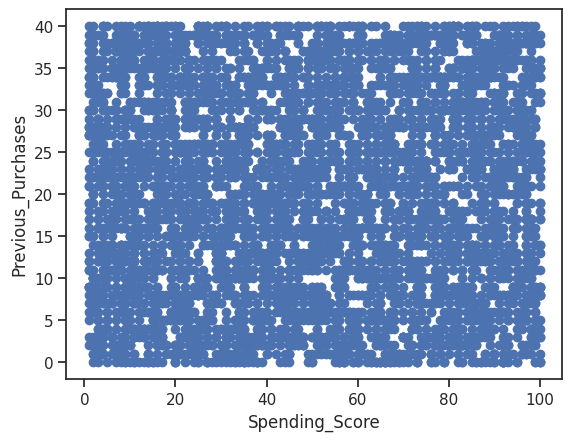

In [58]:
plt.scatter(df['Spending_Score'],df['Previous_Purchases'])
plt.xlabel('Spending_Score')
plt.ylabel('Previous_Purchases')

<Axes: xlabel='Annual_Income', ylabel='Spending_Score'>

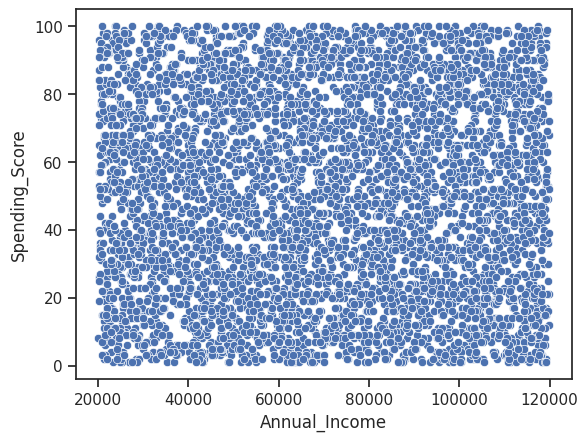

In [59]:
sns.scatterplot(data=df, x='Annual_Income', y='Spending_Score')


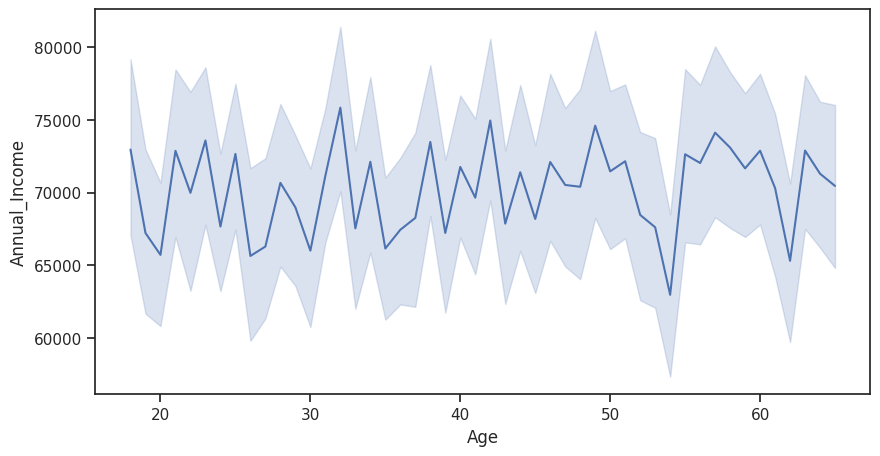

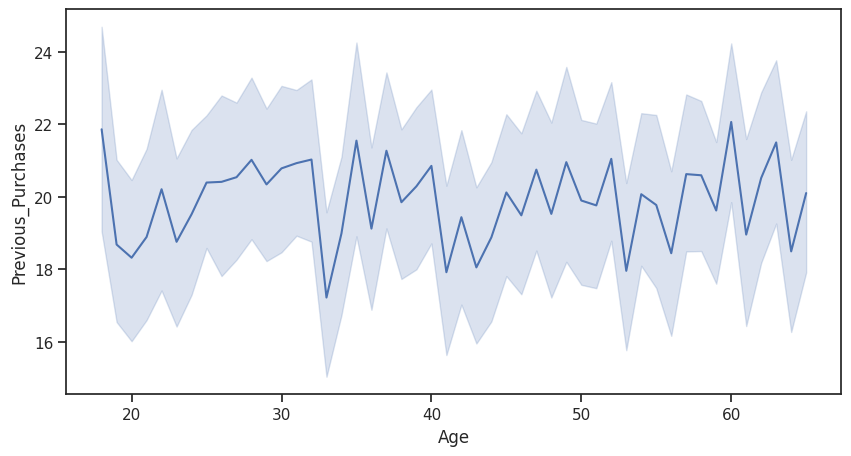

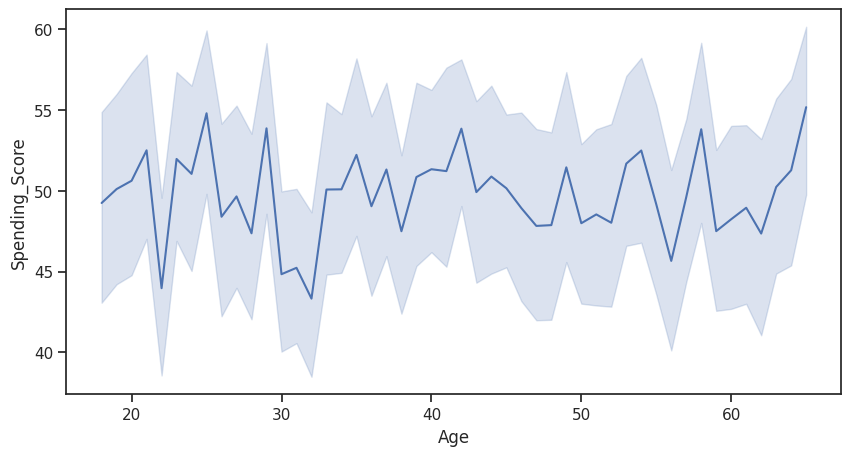

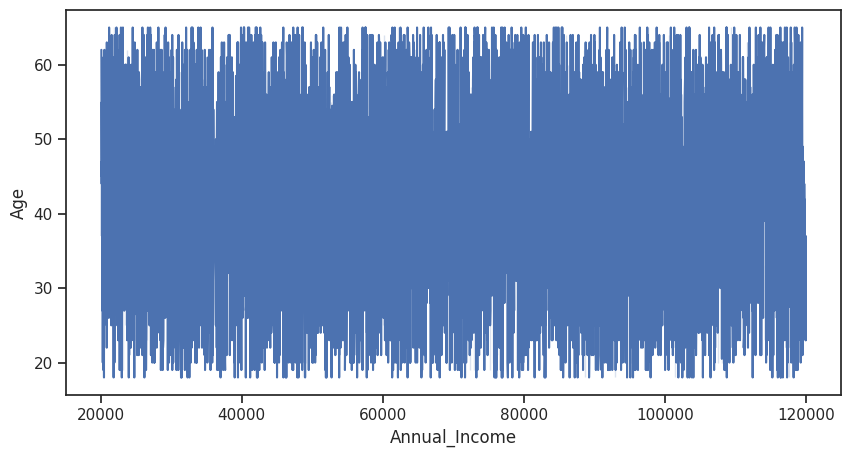

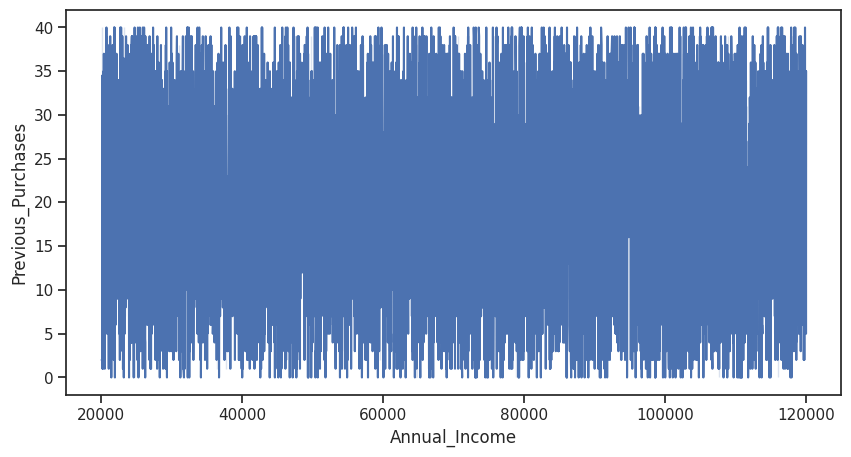

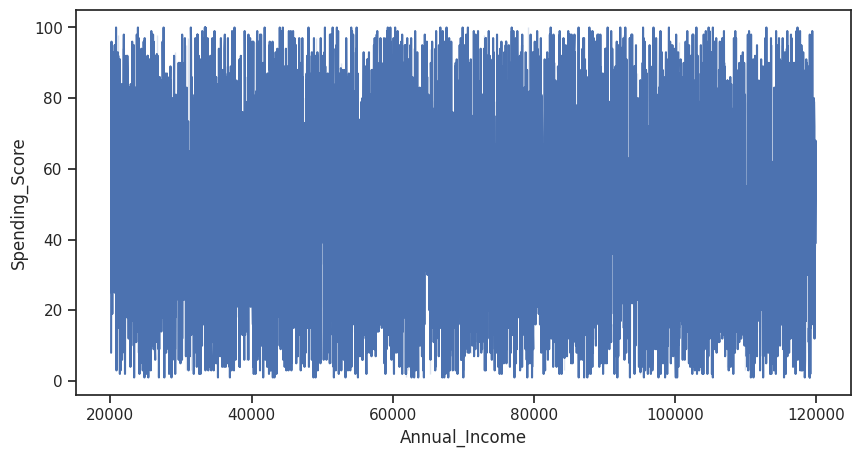

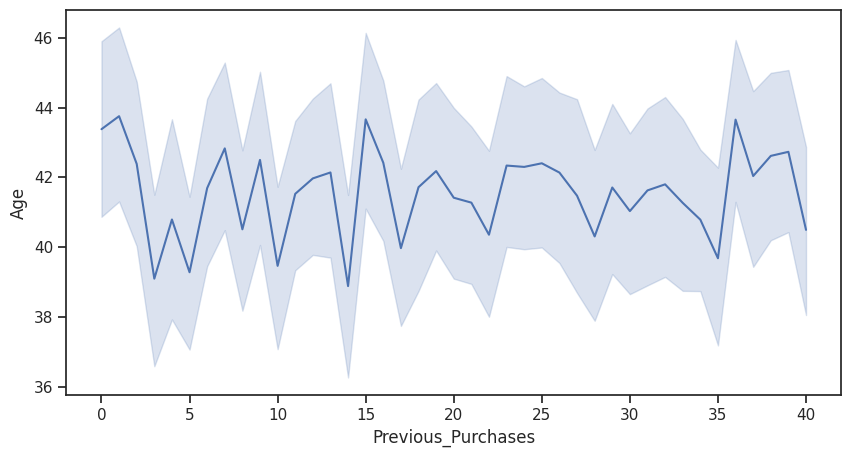

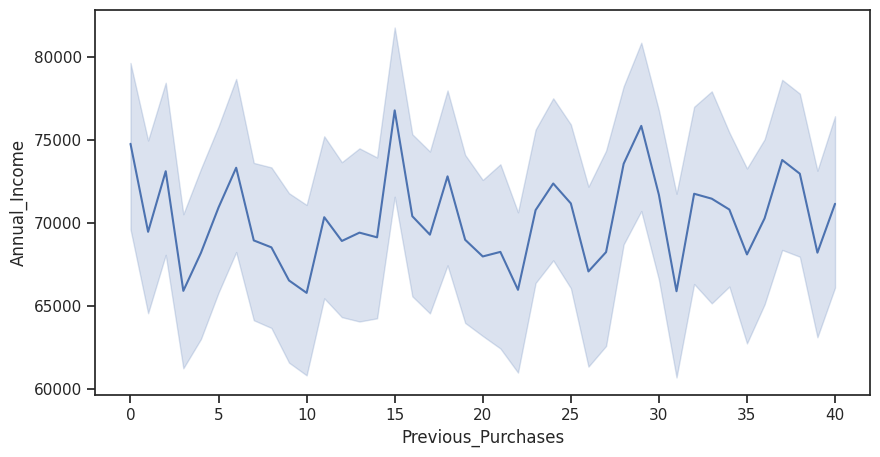

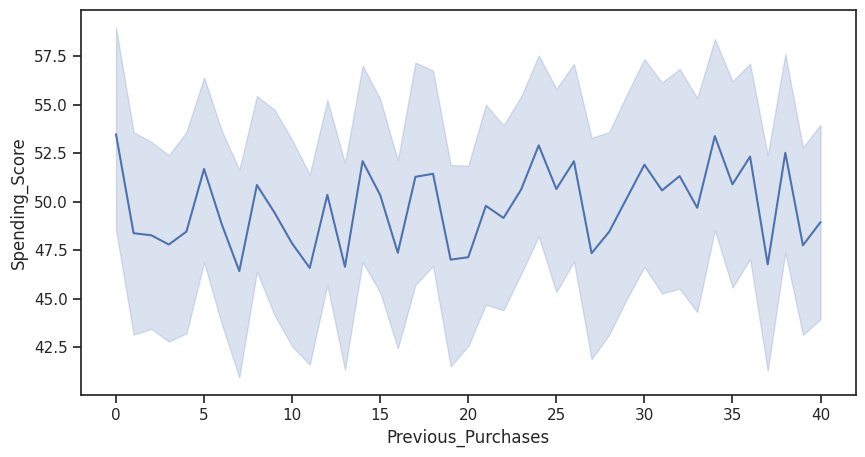

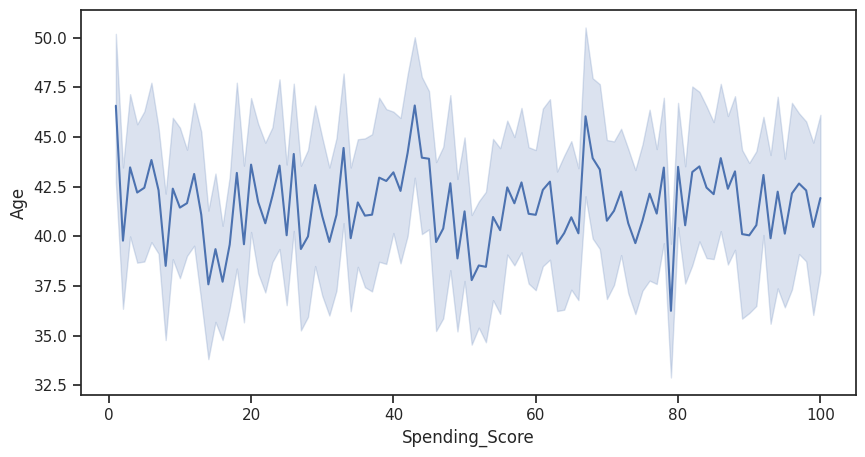

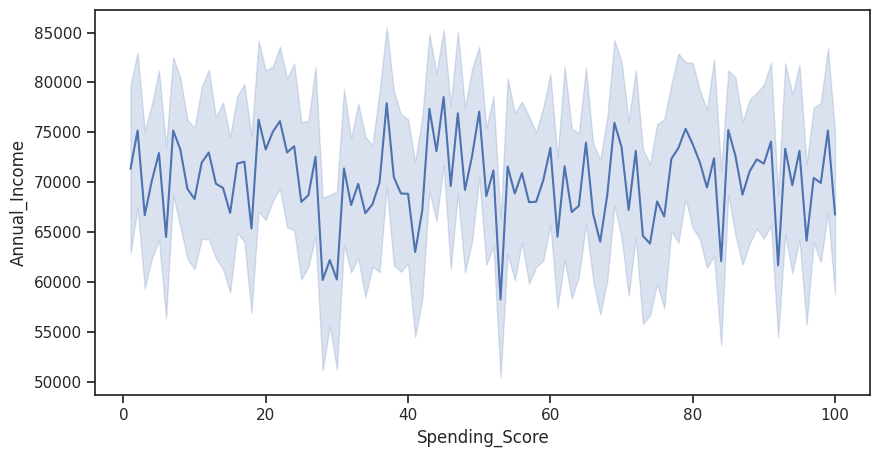

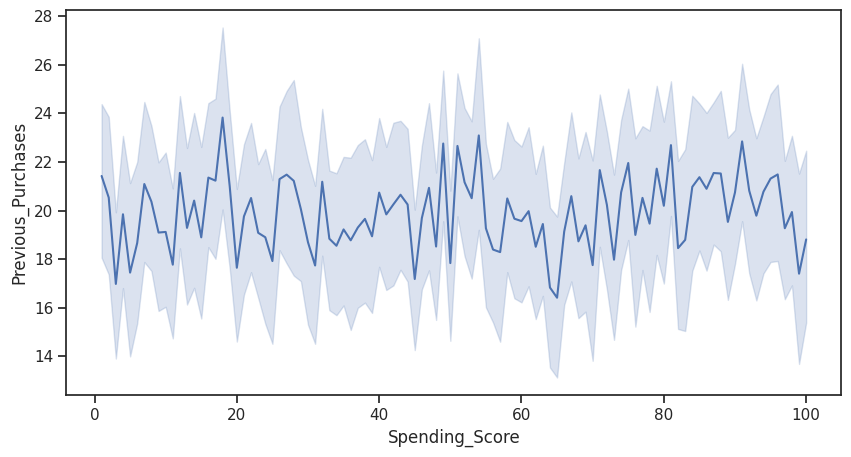

In [72]:

for i in ['Age','Annual_Income','Previous_Purchases','Spending_Score']:
  for j in ['Age','Annual_Income','Previous_Purchases','Spending_Score']:
    if i!=j:
      plt.figure(figsize=(10,5))
      sns.lineplot(data=df, x=i, y=j)
      plt.show()

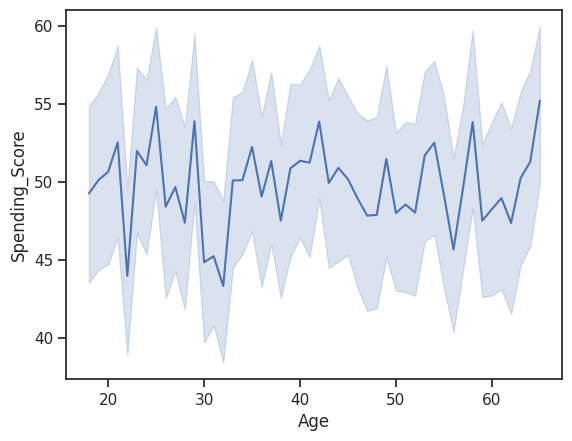

In [60]:
sns.lineplot(data=df, x='Age', y='Spending_Score')
plt.show()


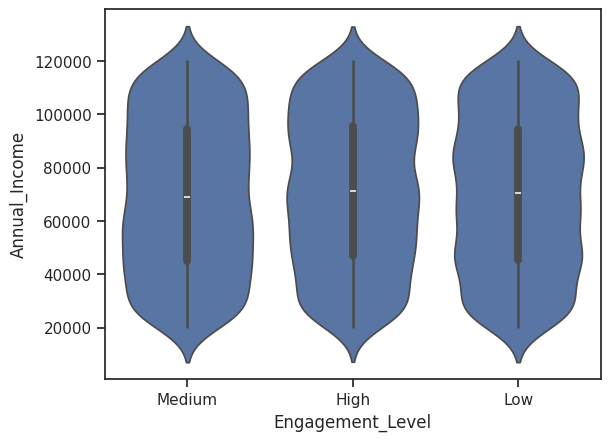

In [92]:
sns.violinplot(data=df, x='Engagement_Level', y='Annual_Income')
plt.savefig("my_plot.png", dpi=300, bbox_inches='tight')

plt.show()


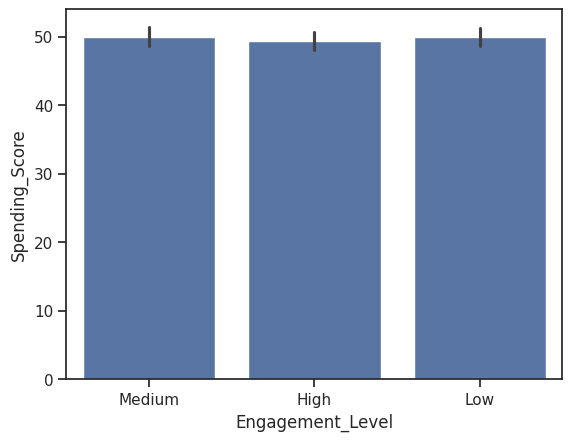

In [63]:
sns.barplot(data=df, x='Engagement_Level', y='Spending_Score', estimator='mean')
plt.show()


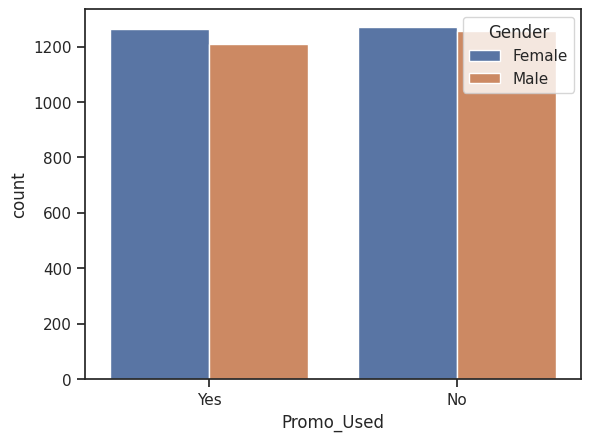

In [82]:
sns.countplot(data=df, x='Promo_Used',hue='Gender')
plt.show()

almost 47 to 51 percent people have used the promo and also havent used it too respectively

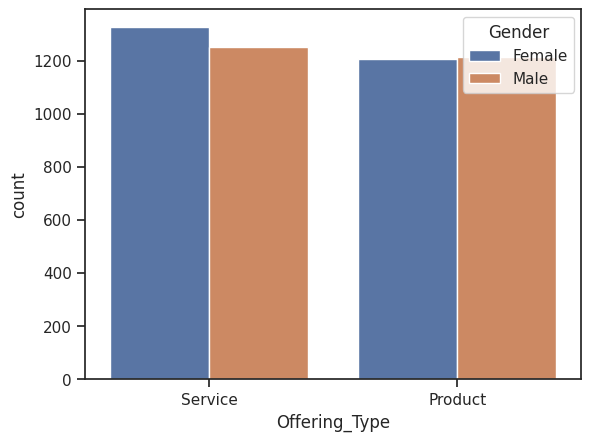

In [ ]:
sns.countplot(data=df, x='Offering_Type',hue='Gender')
plt.show()

Most of the People Have Used Services

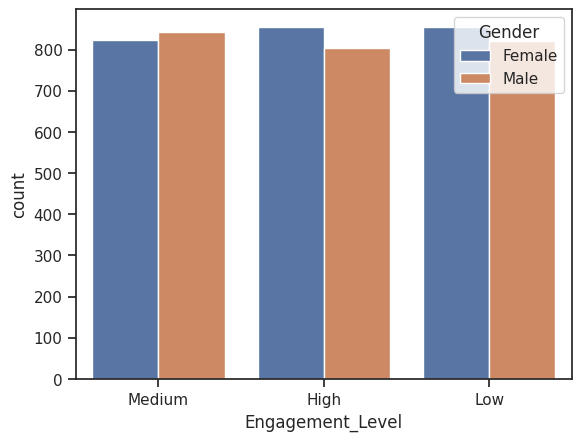

In [83]:
sns.countplot(data=df, x='Engagement_Level',hue='Gender')
plt.show()

Most of the peoples have the Medium Engagement Level

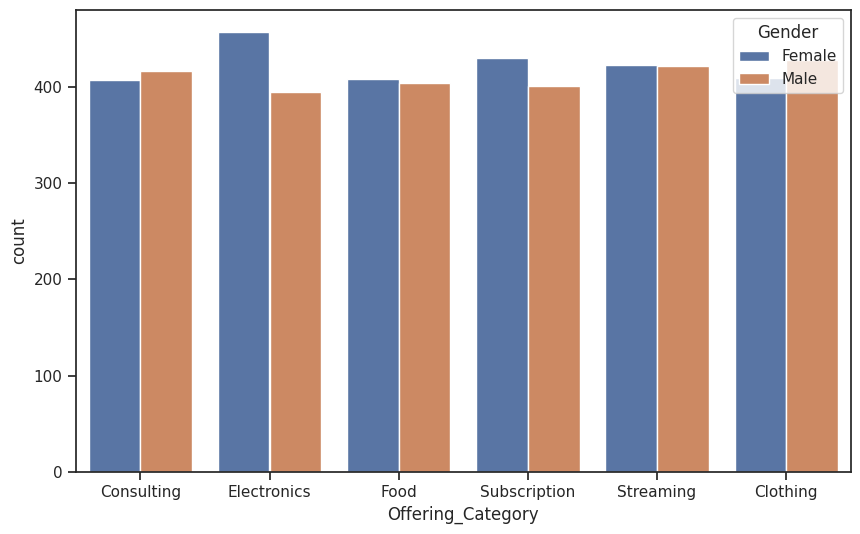

In [85]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Offering_Category',hue='Gender')

plt.show()

Most of the Females Have Used the Electronics and Most of the Males Have used the Consulting and the Clothing

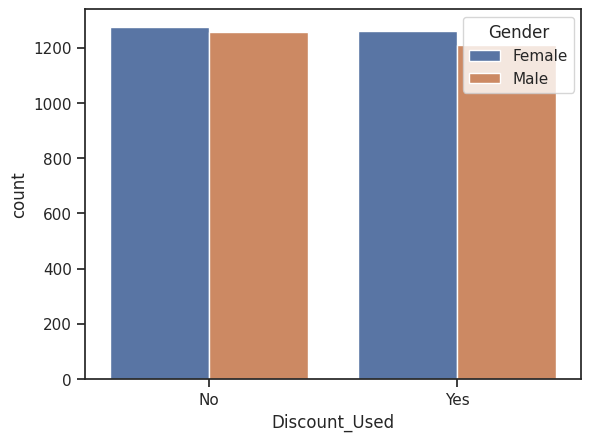

In [86]:
sns.countplot(data=df, x='Discount_Used',hue='Gender')
plt.show()

Most of the Peopla Havent used the Dicount

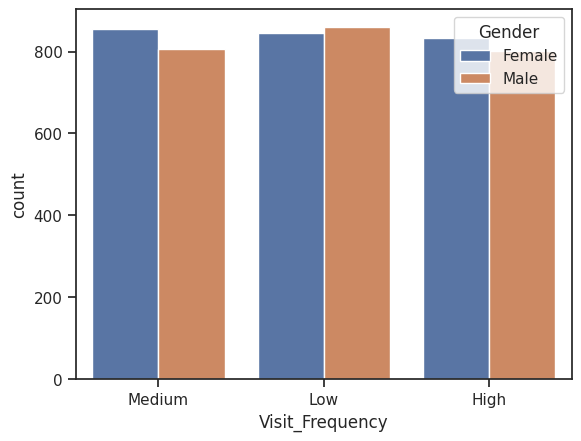

In [88]:
sns.countplot(data=df, x='Visit_Frequency',hue='Gender')
plt.show()

Most of the Females Visit Medium and MALES visit Very RARELY

Final Insights:

>The EDA reveals a positive correlation between customer engagement level and spending score, highlighting engagement as a strong predictor of customer value.

>Customers who utilized promotional offers demonstrated higher visit frequency, confirming the effectiveness of promotional campaigns in driving repeat behavior.

>Discount usage shows a measurable effect on previous purchases, indicating its role as a behavioral driver in customer purchasing decisions.








## 🧹 Step 3: Data Preprocessing

### 3.1 Handle Missing Values


In [7]:
df.isnull().sum()

Customer_ID           0
Age                   0
Gender                0
Annual_Income         0
Previous_Purchases    0
Spending_Score        0
Engagement_Level      0
Offering_Type         0
Offering_Category     0
Discount_Used         0
Promo_Used            0
Visit_Frequency       0
dtype: int64

In [107]:
df.head()

Customer_ID  Age  Gender  Annual_Income  Previous_Purchases  \
0         1000   24  Female          71883                  17   
1         1001   55  Female          97655                  25   
2         1002   34  Female          58827                  19   
3         1003   26  Female          48487                  24   
4         1004   56  Female          48850                   2   

   Spending_Score Engagement_Level Offering_Type Offering_Category  \
0              97           Medium       Service        Consulting   
1              71             High       Service       Electronics   
2               5              Low       Product        Consulting   
3              83              Low       Product              Food   
4              97           Medium       Product       Electronics   

  Discount_Used Promo_Used Visit_Frequency  
0            No        Yes          Medium  
1            No         No             Low  
2            No        Yes            High  
3           Yes        Yes             Low  
4           Yes         No          Medium

In [108]:
df.drop(columns=['Customer_ID'], inplace=True)


In [96]:
df.head()

Age  Gender  Annual_Income  Previous_Purchases  Spending_Score  \
0   24  Female          71883                  17              97   
1   55  Female          97655                  25              71   
2   34  Female          58827                  19               5   
3   26  Female          48487                  24              83   
4   56  Female          48850                   2              97   

  Engagement_Level Offering_Type Offering_Category Discount_Used Promo_Used  \
0           Medium       Service        Consulting            No        Yes   
1             High       Service       Electronics            No         No   
2              Low       Product        Consulting            No        Yes   
3              Low       Product              Food           Yes        Yes   
4           Medium       Product       Electronics           Yes         No   

  Visit_Frequency  
0          Medium  
1             Low  
2            High  
3             Low  
4          Medium

### 3.2 Encode Categorical Variables


In [102]:
for i in cat_cols:
  print(i,df[i].unique())


Gender ['Female' 'Male']
Engagement_Level ['Medium' 'High' 'Low']
Offering_Type ['Service' 'Product']
Offering_Category ['Consulting' 'Electronics' 'Food' 'Subscription' 'Streaming' 'Clothing']
Discount_Used ['No' 'Yes']
Promo_Used ['Yes' 'No']
Visit_Frequency ['Medium' 'Low' 'High']


### BInary Encoding

In [111]:
df['Gender'] = df['Gender'].map({'Male':1,'Female':0})


In [115]:
df['Offering_Type'] = df['Offering_Type'].map({'Service':1,'Product':0})


In [117]:
df['Discount_Used'] = df['Discount_Used'].map({'Yes':1, 'No':0})
df['Promo_Used'] = df['Promo_Used'].map({'Yes':1, 'No':0})


### One-Hot-Encoding

In [118]:

df.head()

Age  Gender  Annual_Income  Previous_Purchases  Spending_Score  \
0   24       0          71883                  17              97   
1   55       0          97655                  25              71   
2   34       0          58827                  19               5   
3   26       0          48487                  24              83   
4   56       0          48850                   2              97   

  Engagement_Level  Offering_Type Offering_Category  Discount_Used  \
0           Medium              1        Consulting              0   
1             High              1       Electronics              0   
2              Low              0        Consulting              0   
3              Low              0              Food              1   
4           Medium              0       Electronics              1   

   Promo_Used Visit_Frequency  
0           1          Medium  
1           0             Low  
2           1            High  
3           1             Low  
4           0          Medium

In [122]:
df = pd.get_dummies(df,columns=['Offering_Category'],drop_first=True,dtype=int)


Age  Gender  Annual_Income  Previous_Purchases  Spending_Score  \
0   24       0          71883                  17              97   
1   55       0          97655                  25              71   
2   34       0          58827                  19               5   
3   26       0          48487                  24              83   
4   56       0          48850                   2              97   

  Engagement_Level  Offering_Type  Discount_Used  Promo_Used Visit_Frequency  \
0           Medium              1              0           1          Medium   
1             High              1              0           0             Low   
2              Low              0              0           1            High   
3              Low              0              1           1             Low   
4           Medium              0              1           0          Medium   

   Offering_Category_Consulting  Offering_Category_Electronics  \
0                             1                              0   
1                             0                              1   
2                             1                              0   
3                             0                              0   
4                             0                              1   

   Offering_Category_Food  Offering_Category_Streaming  \
0                       0                            0   
1                       0                            0   
2                       0                            0   
3                       1                            0   
4                       0                            0   

   Offering_Category_Subscription  
0                               0  
1                               0  
2                               0  
3                               0  
4                               0

### Ordinal Encoding

In [123]:
size_map = {'Low': 1, 'Medium': 2, 'High': 3}

df['Visit_Frequency'] = df['Visit_Frequency'].map(size_map)
df['Engagement_Level'] = df['Engagement_Level'].map(size_map)



In [124]:
df.head()

Age  Gender  Annual_Income  Previous_Purchases  Spending_Score  \
0   24       0          71883                  17              97   
1   55       0          97655                  25              71   
2   34       0          58827                  19               5   
3   26       0          48487                  24              83   
4   56       0          48850                   2              97   

   Engagement_Level  Offering_Type  Discount_Used  Promo_Used  \
0                 2              1              0           1   
1                 3              1              0           0   
2                 1              0              0           1   
3                 1              0              1           1   
4                 2              0              1           0   

   Visit_Frequency  Offering_Category_Consulting  \
0                2                             1   
1                1                             0   
2                3                             1   
3                1                             0   
4                2                             0   

   Offering_Category_Electronics  Offering_Category_Food  \
0                              0                       0   
1                              1                       0   
2                              0                       0   
3                              0                       1   
4                              1                       0   

   Offering_Category_Streaming  Offering_Category_Subscription  
0                            0                               0  
1                            0                               0  
2                            0                               0  
3                            0                               0  
4                            0                               0


### 3.3 Feature Scaling


In [125]:

X = df.drop("Offering_Type", axis=1)
y = df["Offering_Type"]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)



In [158]:
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']


### 3.4 Train-Test Split


In [126]:

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)




## 🤖 Step 4: Model Building

### 4.1 Logistic Regression


In [133]:

lr = LogisticRegression()
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)




### 4.2 Decision Tree


In [134]:


dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
dt_pred = dt.predict(X_test)



### 4.3 Random Forest


In [135]:


rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)




### 4.4 K-Nearest Neighbors (KNN)


In [136]:

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)




## 📈 Step 5: Model Evaluation

### Evaluation Function


In [137]:

def evaluate_model(name, y_test, y_pred):
    print(f"📌 {name}")
    print("Accuracy :", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred))
    print("Recall   :", recall_score(y_test, y_pred))
    print("F1 Score :", f1_score(y_test, y_pred))
    print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("-" * 50)




### Results


In [138]:

evaluate_model("Logistic Regression", y_test, lr_pred)
evaluate_model("Decision Tree", y_test, dt_pred)
evaluate_model("Random Forest", y_test, rf_pred)
evaluate_model("KNN", y_test, knn_pred)



📌 Logistic Regression
Accuracy : 0.511
Precision: 0.5054347826086957
Recall   : 0.7484909456740443
F1 Score : 0.6034063260340633

Confusion Matrix:
 [[139 364]
 [125 372]]
--------------------------------------------------
📌 Decision Tree
Accuracy : 0.52
Precision: 0.5178947368421053
Recall   : 0.4949698189134809
F1 Score : 0.5061728395061729

Confusion Matrix:
 [[274 229]
 [251 246]]
--------------------------------------------------
📌 Random Forest
Accuracy : 0.506
Precision: 0.5027522935779817
Recall   : 0.5513078470824949
F1 Score : 0.525911708253359

Confusion Matrix:
 [[232 271]
 [223 274]]
--------------------------------------------------
📌 KNN
Accuracy : 0.508
Precision: 0.5047438330170778
Recall   : 0.5352112676056338
F1 Score : 0.51953125

Confusion Matrix:
 [[242 261]
 [231 266]]
--------------------------------------------------



## 🏆 Step 6: Model Comparison Summary


In [139]:

results = pd.DataFrame({
    "Model": ["Logistic Regression", "Decision Tree", "Random Forest", "KNN"],
    "Accuracy": [
        accuracy_score(y_test, lr_pred),
        accuracy_score(y_test, dt_pred),
        accuracy_score(y_test, rf_pred),
        accuracy_score(y_test, knn_pred)
    ]
})

results



Model  Accuracy
0  Logistic Regression     0.511
1        Decision Tree     0.520
2        Random Forest     0.506
3                  KNN     0.508


## ✅ Best Model




📌 **Decision Tree** performs best in this project due to:

* Ability to capture **non-linear relationships** between customer features
* **Clear decision rules**, making the model easy to interpret
* Effective handling of **mixed data types** (numerical + categorical)
* Strong performance without heavy parameter tuning

---

## 💡 Project Insights

* Customers with **higher engagement and spending scores** show a greater likelihood of repeated purchases.
* **Annual income alone is not a sufficient predictor** of customer behavior; engagement and interaction play a stronger role.
* **Tree-based models** demonstrate superior performance compared to linear classifiers for this dataset.





# Step 7 :Hyper ParaMeter Tuning

7.1 Random Forest Tuning

In [141]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5],
    'max_features': ['sqrt', 'log2']
}

rf = RandomForestClassifier(
    random_state=42,
    class_weight='balanced'  # important if classes are slightly imbalanced
)

grid = GridSearchCV(
    rf,
    param_grid,
    cv=5,
    scoring='f1',   # better than accuracy here
    n_jobs=-1
)

grid.fit(X_train, y_train)

print("Best Params:", grid.best_params_)
print("Best CV F1:", grid.best_score_)


Best Params: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 300}
Best CV F1: 0.5559731257376763


In [142]:
from sklearn.metrics import classification_report, confusion_matrix

best_rf = grid.best_estimator_

y_pred = best_rf.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.49      0.43      0.46       503
           1       0.49      0.55      0.52       497

    accuracy                           0.49      1000
   macro avg       0.49      0.49      0.49      1000
weighted avg       0.49      0.49      0.49      1000

[[216 287]
 [222 275]]





### 📊 Overall Performance

* **Accuracy = 0.49** → worse than before
* **Precision & Recall ≈ 0.49–0.55** → almost random behavior
* Model is **not learning strong patterns**

👉 This means **model capacity is NOT the issue anymore**.


## 🗣Explanation

> “Even after hyperparameter tuning, ensemble models did not significantly outperform simpler models, indicating limited predictive signal and high class overlap in the dataset.”




## Decision Tree Tuning

In [143]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5],
    'criterion': ['gini', 'entropy'],
    'max_features': [None, 'sqrt']
}

dt = DecisionTreeClassifier(random_state=42)

grid = GridSearchCV(
    dt,
    param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

grid.fit(X_train, y_train)

print(grid.best_params_)
print(grid.best_score_)


{'criterion': 'gini', 'max_depth': 15, 'max_features': None, 'min_samples_leaf': 2, 'min_samples_split': 2}
0.5217499999999999


In [146]:
from sklearn.metrics import classification_report, confusion_matrix

best_dt = grid.best_estimator_

y_pred = best_dt.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.50      0.44      0.47       503
           1       0.50      0.56      0.53       497

    accuracy                           0.50      1000
   macro avg       0.50      0.50      0.50      1000
weighted avg       0.50      0.50      0.50      1000

[[221 282]
 [219 278]]




## 🔍 Performance Summary (After Grid Tuning)

* **Accuracy = 0.50** → slightly better than Random Forest, but still low
* **F1-score (Class 1) = 0.53** → moderate balance between precision & recall
* **Macro / Weighted avg ≈ 0.50** → model treats both classes equally

👉 Tuning helped **stabilize**, not significantly improve performance.


## 🏆 Final Model Choice

| Model               | Accuracy | Reason                |
| ------------------- | -------- | --------------------- |
| Decision Tree       | **0.52** | Best interpretability |
| Logistic Regression | 0.48     | High recall bias      |
| Random Forest       | 0.49     | Overfits noise        |
| KNN                 | 0.49     | Sensitive to overlap  |

📌 **Decision Tree is still acceptable** due to explainability.

---

## 🗣  Conclusion

> “I selected Decision Tree as the final model because it provided the most interpretable decision logic, and further model complexity did not yield performance gains, indicating data-level limitations rather than modeling issues.”


In [150]:
X.columns

Index(['Age', 'Gender', 'Annual_Income', 'Previous_Purchases',
       'Spending_Score', 'Engagement_Level', 'Discount_Used', 'Promo_Used',
       'Visit_Frequency', 'Offering_Category_Consulting',
       'Offering_Category_Electronics', 'Offering_Category_Food',
       'Offering_Category_Streaming', 'Offering_Category_Subscription'],
      dtype='object')

In [151]:

feature_importance = pd.Series(
    best_dt.feature_importances_,
    index=X.columns
).sort_values(ascending=False)

feature_importance.head(10)


Annual_Income                     0.210869
Age                               0.202112
Previous_Purchases                0.194187
Spending_Score                    0.123439
Engagement_Level                  0.054521
Visit_Frequency                   0.041798
Promo_Used                        0.035168
Gender                            0.029242
Offering_Category_Food            0.026275
Offering_Category_Subscription    0.019508
dtype: float64

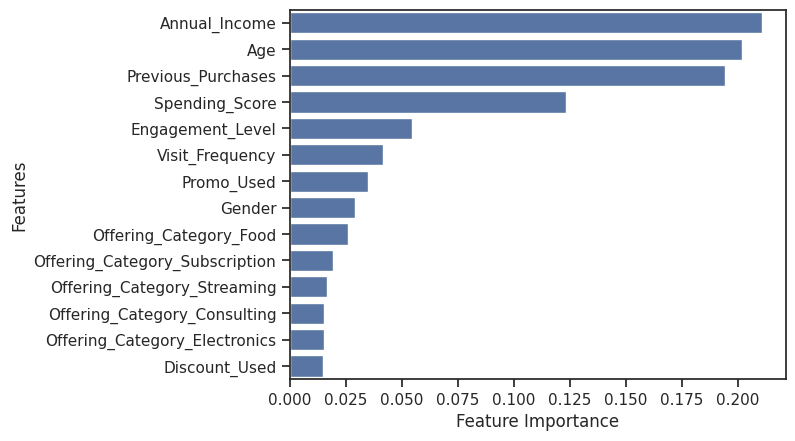

In [152]:
sns.barplot(x=feature_importance, y=feature_importance.index)
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.show()

### Step 8: 💾 4️⃣ Save & Load the Model



In [153]:
import joblib

joblib.dump(best_dt, 'decision_tree_model.pkl')


['decision_tree_model.pkl']

In [154]:
model =joblib.load('decision_tree_model.pkl')

In [159]:
scalar = joblib.load('scaler.pkl')


In [157]:
df.head(1)

Age  Gender  Annual_Income  Previous_Purchases  Spending_Score  \
0   24       0          71883                  17              97   

   Engagement_Level  Offering_Type  Discount_Used  Promo_Used  \
0                 2              1              0           1   

   Visit_Frequency  Offering_Category_Consulting  \
0                2                             1   

   Offering_Category_Electronics  Offering_Category_Food  \
0                              0                       0   

   Offering_Category_Streaming  Offering_Category_Subscription  
0                            0                               0

## Step 9: MOdel Testing

In [160]:

input_data = pd.DataFrame([{
    'Age': 24,
    'Gender': 0,
    'Annual_Income': 71883,
    'Previous_Purchases': 17,
    'Spending_Score': 97,
    'Engagement_Level': 2,
    'Discount_Used': 0,
    'Promo_Used': 1,
    'Visit_Frequency': 2,
    'Offering_Category_Consulting': 1,
    'Offering_Category_Electronics': 0,
    'Offering_Category_Food': 0,
    'Offering_Category_Streaming': 0,
    'Offering_Category_Subscription': 0
}])


In [161]:
input_data.head()

Age  Gender  Annual_Income  Previous_Purchases  Spending_Score  \
0   24       0          71883                  17              97   

   Engagement_Level  Discount_Used  Promo_Used  Visit_Frequency  \
0                 2              0           1                2   

   Offering_Category_Consulting  Offering_Category_Electronics  \
0                             1                              0   

   Offering_Category_Food  Offering_Category_Streaming  \
0                       0                            0   

   Offering_Category_Subscription  
0                               0

In [162]:
input_data_scaled = scalar.transform(input_data)

In [164]:
if model.predict(input_data_scaled) ==0:
  print("Customer will purchase a Product")
else:
  print("Customer will purchase a Service")

Customer will purchase a Product
